![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


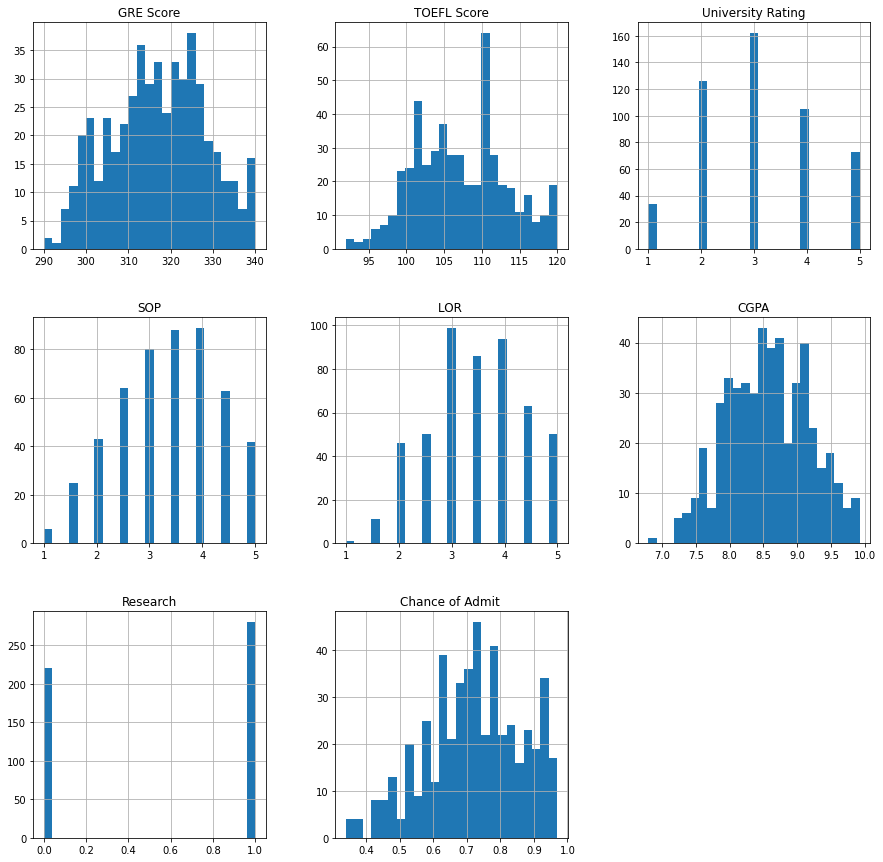

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]
Y = Y.values

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
from sklearn.preprocessing import StandardScaler
from datetime import datetime   # Para tiempo de ejecución

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

En la **celda anterior se realiza en proceso de estandarización de los datos de entremaniento y de validación**. En **la siguiente celda calculamos la cantidad de variables de entrada o explicativas y la variable de respuesta**, la probabilidad de ingreso al auniversidad ('Chance of Admit').

In [8]:
dims = X_train.shape[1]
print(dims, 'input variables')
output_var = 1
print(output_var, ' output variables')

7 input variables
1  output variables


In [9]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

Ahora definimos la **red neuronal de tipo secuencial y agregamos solo una capa**. Aquí utilizamos como **función de activación la sigmoide** ya que entrega como valores de salida números entre 0 y 1, **permitiendo fácilmente describir probabilidades**: 

In [10]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,), activation = 'sigmoid', kernel_initializer = 'normal'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


Vamos a compilar el modelo. Utilizamos el optimizador **adam** porque con los demás optimizadores se presentaba problemas en las predicciones en algunas corridas de entrenamiento de la red. También agregamos el calculo de las métircas MSE y MAE.

In [11]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mse', 'mae'])

Finalmente **entrenamos la red neuronal y visualizamos las dos métricas deseadas para cada época del modelo**. La red se entrena durante **200 épocas**.

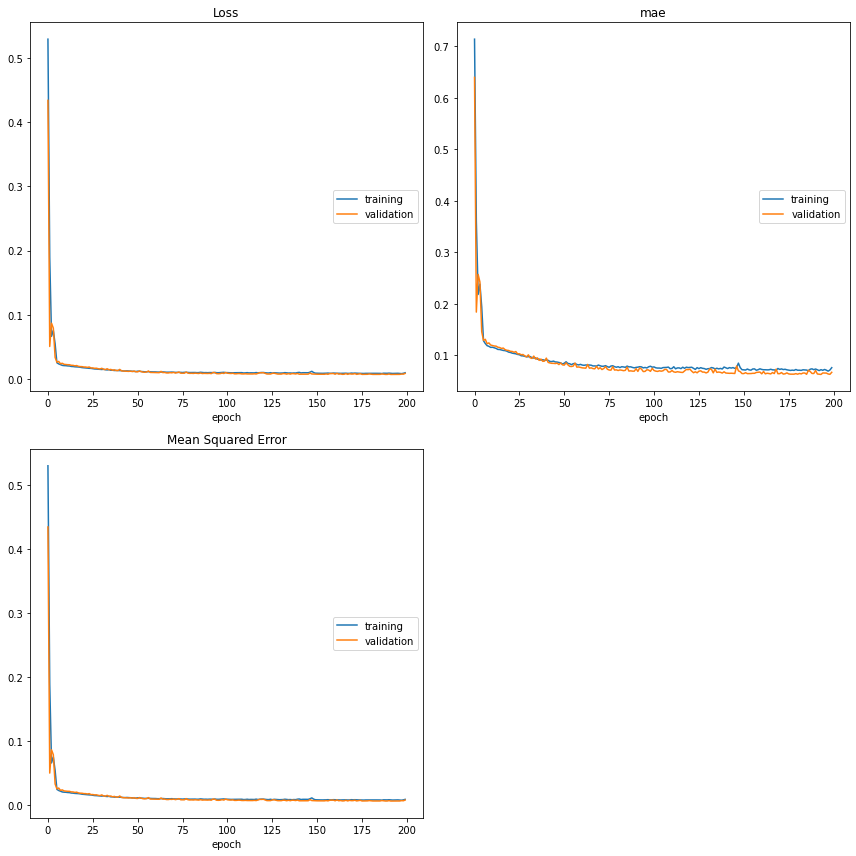

Loss
	training         	 (min:    0.008, max:    0.530, cur:    0.009)
	validation       	 (min:    0.007, max:    0.434, cur:    0.008)
mae
	training         	 (min:    0.069, max:    0.714, cur:    0.076)
	validation       	 (min:    0.063, max:    0.640, cur:    0.067)
Mean Squared Error
	training         	 (min:    0.008, max:    0.530, cur:    0.009)
	validation       	 (min:    0.007, max:    0.434, cur:    0.008)
11/11 [==============================] - 1s 65ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0760 - val_loss: 0.0085 - val_mse: 0.0085 - val_mae: 0.0670
Tiempo transcurrido: 0:02:06.397231


In [12]:
# Entrenamiento de la red neuronal con 50 épocas
inicio = datetime.now() # Inicio del tiempo de ejecución

model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=200, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

print('Tiempo transcurrido:',datetime.now()-inicio) # Impresión del tiempo total de ejecución

Realizamos las **predicciones de la probabilidad de ser admitido a la universidad** con la red entrenada.

In [13]:
y_pred = model.predict(xTest)

En la siguiente celda realizamos una comparación visual entre los datos reales y los predichos. En la gráfica podemos ver **en azul los valores reales de probabilida de admisión a la universidad y en verde los valores predichos por la red neuronal**. Notamos que en general los valores predichos para los valores altos son más pequeños que los reales.

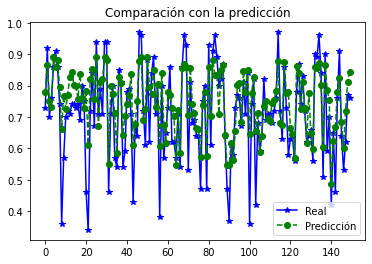

In [14]:
plt.plot(list(range(len(yTest))), yTest, color='blue', marker='*', label='Real')
plt.plot(list(range(len(yTest))), y_pred, color='green', marker='o', linestyle='dashed',label='Predicción')
plt.title('Comparación con la predicción')
plt.legend(loc='best')

Finalmente, presentamos el **desempeño de la red neuronal con las métricas del error cuadrático medio (MSE, mean square error) y el error absoluto medio (MAE, mean square error):**

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MSE:' , mean_absolute_error(yTest, y_pred))
print('MAE:' , mean_squared_error(yTest, y_pred))

# Guardar el desempeño del modelo con las métricas MSE y MAE
MSE_1 = mean_absolute_error(yTest, y_pred)
MAE_1 = mean_squared_error(yTest, y_pred)
metricas1 ={'MSE':MSE_1, 'MAE':MAE_1}

MSE: 0.06701452864805857
MAE: 0.008452424665273432


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Definimos la **red neuronal de tipo secuencial y agregamos dos capas**. Aquí utilizamos como **función de activación la sigmoide** ya que entrega como valores de salida números entre 0 y 1, **permitiendo fácilmente describir probabilidades**: 

In [16]:
# Celda 2

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capas
model.add(Dense(256, input_shape=(dims,), activation = 'sigmoid', kernel_initializer = 'normal'))
model.add(Dense(output_var, activation = 'sigmoid', kernel_initializer = 'normal'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


Vamos a compilar el modelo. Utilizamos el optimizador **adam** porque con los demás optimizadores se presentaba problemas en las predicciones en algunas corridas de entrenamiento de la red. También agregamos el calculo de las métircas MSE y MAE.

In [17]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mse', 'mae'])

Finalmente **entrenamos la red neuronal y visualizamos las dos métricas deseadas para cada época del modelo**. La red se entrena durante **200 épocas**.

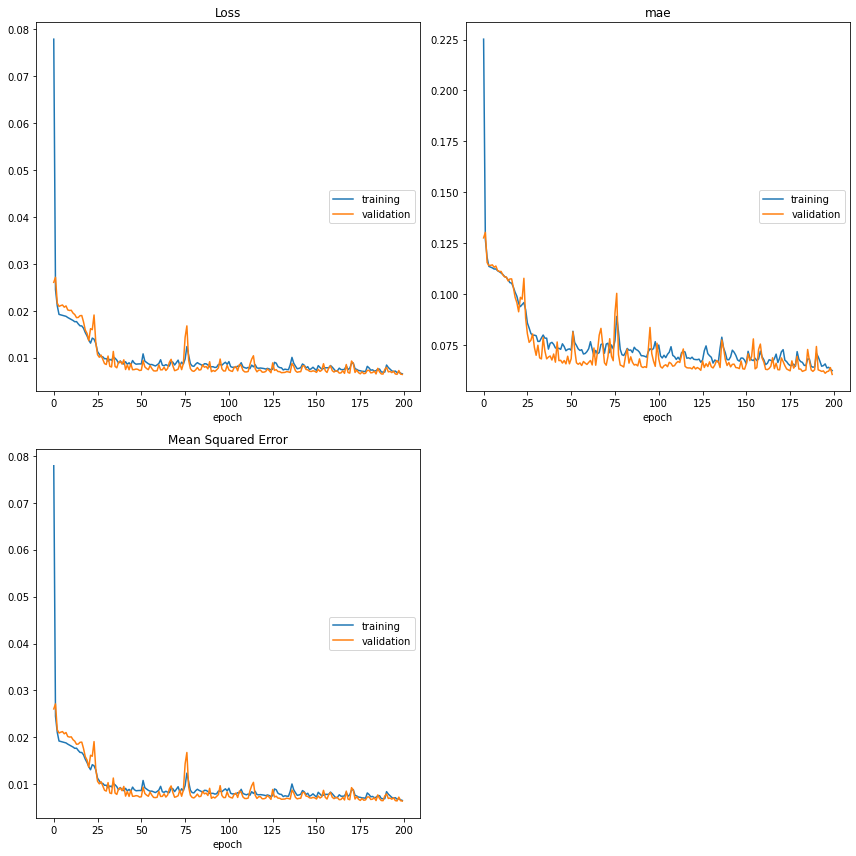

Loss
	training         	 (min:    0.007, max:    0.078, cur:    0.007)
	validation       	 (min:    0.006, max:    0.027, cur:    0.006)
mae
	training         	 (min:    0.062, max:    0.225, cur:    0.062)
	validation       	 (min:    0.060, max:    0.130, cur:    0.060)
Mean Squared Error
	training         	 (min:    0.007, max:    0.078, cur:    0.007)
	validation       	 (min:    0.006, max:    0.027, cur:    0.006)
11/11 [==============================] - 1s 63ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0624 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0605
Tiempo transcurrido: 0:02:14.830386


In [18]:
# Entrenamiento de la red neuronal con 50 épocas
inicio = datetime.now() # Inicio del tiempo de ejecución

model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=200, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

print('Tiempo transcurrido:',datetime.now()-inicio) # Impresión del tiempo total de ejecución

Realizamos las **predicciones de la probabilidad de ser admitido a la universidad** con la red entrenada.

In [19]:
y_pred = model.predict(xTest)

En la siguiente celda realizamos una comparación visual entre los datos reales y los predichos. En la gráfica podemos ver **en azul los valores reales de probabilida de admisión a la universidad y en verde los valores predichos por la red neuronal**. Notamos que en general los valores predichos para los valores altos son más pequeños que los reales.

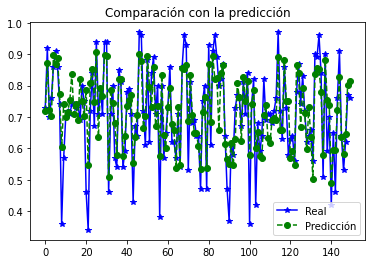

In [20]:
plt.plot(list(range(len(yTest))), yTest, color='blue', marker='*', label='Real')
plt.plot(list(range(len(yTest))), y_pred, color='green', marker='o', linestyle='dashed',label='Predicción')
plt.title('Comparación con la predicción')
plt.legend(loc='best')

Finalmente, presentamos el **desempeño de la red neuronal con las métricas del error cuadrático medio (MSE, mean square error) y el error absoluto medio (MAE, mean square error):**

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MSE:' , mean_absolute_error(yTest, y_pred))
print('MAE:' , mean_squared_error(yTest, y_pred))

# Guardar el desempeño del modelo con las métricas MSE y MAE
MSE_2 = mean_absolute_error(yTest, y_pred)
MAE_2 = mean_squared_error(yTest, y_pred)
metricas2 ={'MSE':MSE_2, 'MAE':MAE_2}

MSE: 0.060471976582209264
MAE: 0.0064310381222815426


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [22]:
# Celda 3

# Importación librerías
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dropout


Definimos la **red neuronal de tipo secuencial y agregamos dos capas, al igual que el Dropout**. Aquí utilizamos como **función de activación la sigmoide** ya que entrega como valores de salida números entre 0 y 1, **permitiendo fácilmente describir probabilidades**: 

In [23]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición del Dropout en la capa visible
model.add(Dropout(0.2, input_shape=(dims,)))
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,), activation = 'sigmoid', kernel_initializer = 'normal'))
model.add(Dropout(0.2)) # Definición del Dropout en las capas intermedias
model.add(Dense(output_var, activation = 'sigmoid', kernel_initializer = 'normal'))


# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None


Definimos **la función de early stopping con 10 periodos** de no mejora como punto de parada.

In [24]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1) 

Vamos a compilar el modelo. Utilizamos el optimizador **adam** porque con los demás optimizadores se presentaba problemas en las predicciones en algunas corridas de entrenamiento de la red. También agregamos el calculo de las métircas MSE y MAE.

In [25]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mse', 'mae'])

Finalmente **entrenamos la red neuronal y visualizamos las dos métricas deseadas para cada época del modelo**. La red tiene como máximo de entrenamiento **200 épocas**. Pero esto puede cambiar debido a que **al incorporar el early stopping el entrenamiento se detiene antes de alcanzar ese valor máximo posible si no hay mejora en la muestra de validación (lo cual si ocurre)**.

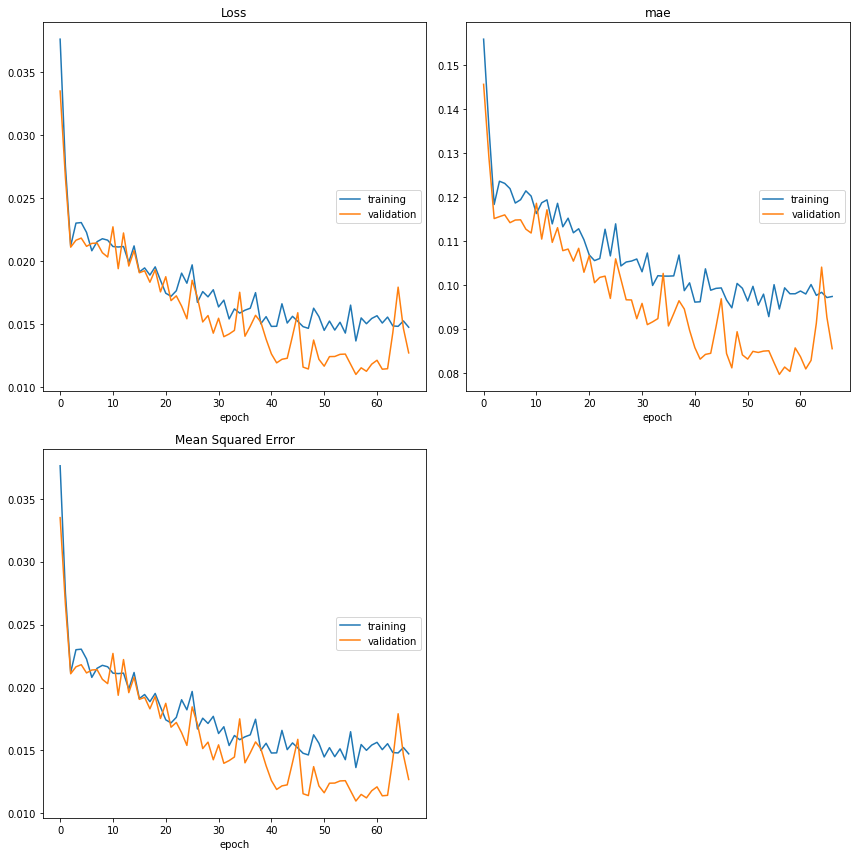

Loss
	training         	 (min:    0.014, max:    0.038, cur:    0.015)
	validation       	 (min:    0.011, max:    0.033, cur:    0.013)
mae
	training         	 (min:    0.093, max:    0.156, cur:    0.097)
	validation       	 (min:    0.080, max:    0.146, cur:    0.085)
Mean Squared Error
	training         	 (min:    0.014, max:    0.038, cur:    0.015)
	validation       	 (min:    0.011, max:    0.033, cur:    0.013)
11/11 [==============================] - 1s 59ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0973 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0855
Epoch 67: early stopping
Tiempo transcurrido: 0:00:42.929229


In [26]:
# Entrenamiento de la red neuronal con 50 épocas
inicio = datetime.now() # Inicio del tiempo de ejecución

model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=200, 
          validation_data=(xTest, yTest),
          callbacks=[early_stop, PlotLossesKeras()])

print('Tiempo transcurrido:',datetime.now()-inicio) # Impresión del tiempo total de ejecución

Realizamos las **predicciones de la probabilidad de ser admitido a la universidad** con la red entrenada.

In [27]:
y_pred = model.predict(xTest)

En la siguiente celda realizamos una comparación visual entre los datos reales y los predichos. En la gráfica podemos ver **en azul los valores reales de probabilida de admisión a la universidad y en verde los valores predichos por la red neuronal**. Notamos que en general los valores predichos para los valores altos son más pequeños que los reales, y en son valores más pequeños que los obtenidos con las dos redes de los puntos anterirores.

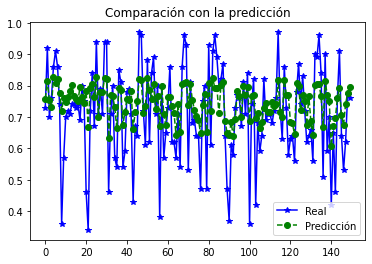

In [28]:
plt.plot(list(range(len(yTest))), yTest, color='blue', marker='*', label='Real')
plt.plot(list(range(len(yTest))), y_pred, color='green', marker='o', linestyle='dashed',label='Predicción')
plt.title('Comparación con la predicción')
plt.legend(loc='best')

Finalmente, presentamos el **desempeño de la red neuronal con las métricas del error cuadrático medio (MSE, mean square error) y el error absoluto medio (MAE, mean square error):**

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MSE:' , mean_absolute_error(yTest, y_pred))
print('MAE:' , mean_squared_error(yTest, y_pred))

# Guardar el desempeño del modelo con las métricas MSE y MAE
MSE_3 = mean_absolute_error(yTest, y_pred)
MAE_3 = mean_squared_error(yTest, y_pred)
metricas3 ={'MSE':MSE_3, 'MAE':MAE_3}

MSE: 0.08546918938954672
MAE: 0.01269293070786401


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

Vamos a realizar una **gráfica de barras comparativa para analizar el desempeño de cada una de las redes neuronales implementadas a partir de las métricas del mean square error, MSE, y la mean absolute error, MAE:**
- Red neuronal de una capa
- Red neuronal de dos capas
- Red neuronal con early stopping y dropout

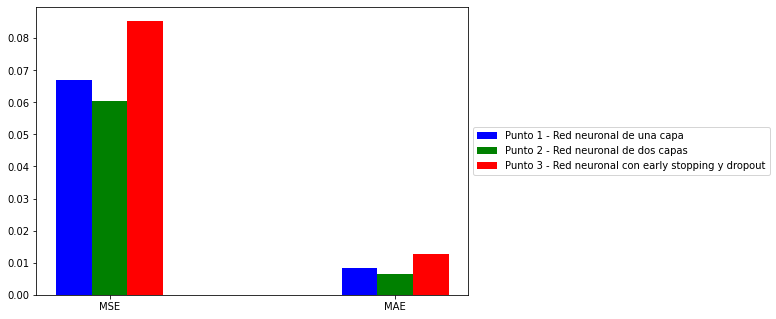

In [30]:
# Celda 4

#keys = auc_roc.keys()
values1 = metricas1.values()
values2 = metricas2.values()
values3 = metricas3.values()

x = ['MSE','MAE']
#plt.bar(keys, values)
#plt.bar(keys2, values2)
X = np.array([1, 3])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.25, values1, color = 'b', width = 0.25,label='Punto 1 - Red neuronal de una capa')
ax.bar(X + 0.00, values2, color = 'g', width = 0.25,label='Punto 2 - Red neuronal de dos capas')
ax.bar(X + 0.25, values3, color = 'r', width = 0.25,label='Punto 3 - Red neuronal con early stopping y dropout')
plt.xticks(X, x)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

En la figura comparativa podemos observar que **la red con dos capas comparada con la de una sola capa es levemente mejor en las dos métricas de desempeño utilizadas (MSE y MAE)**, es decir, al usar 200 épocas/períodos en las redes, la de dos capas logra tener un desempeño mejor (barra verde), permitiendo así ver que aumentar la cantidad de capas en la red puede ofrecer mejoras de desempeño. Sin embargo, **la red neuronal que implementa early stopping y dropout presenta un deterioro en el desempeño consistentemente en las dos métricas, al tener mayor error (barra roja)**, tenemos dos razones que nos pueden llevar a entender esta disminución:
- Primero: al implementar el Dropout en la capa de entrada se retira una de las neuronas, solo quedan 7, por lo tanto, **al tener pocas variables y retirar alguna de ellas la red puede tardar más épocas en llegar a conseguir un buen desempeño, tiene menos información**. Además, al ir añadiendo Dropout entre las diferentes capas de la red, esta iba empeorando su rendimiento. 
- Segundo: al implementar, adicional al Dropout, el early stopping con 10 épocas sin mejorar el error en validación, **la red detiene su entrenamiento bastante antes de conseguir los 200 épocas de máximo entrenamiento establecido, lo cual busca evitar sobre-ajuste**. 

Como conclusión final tenemos que para este conjunto de datos, **hay una especie de empate, la diferencia es pequeña, en el desempeño entre las redes con una sola capa y con dos capas**, así que la ventaja aquí es la sencillez del modelo. Por otro lado, **el peor desempeño está en la red neuronal donde se implementan Dropout y early stopping**, debido a que estas estrategias buscan que la red no produzca overfitting, por lo tanto, en cuanto el modelo deja de mejorar durante 10 periodos detiene el entrenamiento llevando a no sobre-ajustar el modelo, sacrificando poder predictivo del mismo.

Adicionalemnte, **debido al componente de aleatoriedad del modelo de red neuronal, cada vez que se corre/entrena el modelo los valores de las métricas pueden cambiar, aunque mantienen valores similares entre entrenamientos**, lo cual nos puede indicar que al final del día aunque la red aprenda de forma diferente en cada entrenamiento termina aprendiendo estadísticamente la misma información. 